**Chapter 6 – Decision Trees**

_This notebook contains all the sample code and solutions to the exercises in chapter 6._

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/UAPH4582/PH482_582/blob/main/03_Decision_Trees.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

# Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20.

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Training and visualizing

### Task 1 

Build a simple decision tree classifier with max_depth of 2 and random state of 42. Fit the training values obtained from the iris dataset. 

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X,y)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

**Note** Next step requires the GraphViz executable installed. Since there is a lot of additional work, it is recommended to work through a Colab notebook instead. However, if you'd like to continue working locally, follow the steps below. 

To intall GraphViz, download it here: https://graphviz.org/download/

During the installation, make sure its path was added to the Path environmental variable. For your user, add the path to the bin folder, for the system environmental variable, add the path to the ```dot.exe``` file. 
```
C:\Program Files (x86)\Graphviz2.38\bin
C:\Program Files (x86)\Graphviz2.38\bin\dot.exe
``` 

Then, you can use pip or conda to install the package: ```pip install graphiz``` or ```conda install graphiz```

Finally, close your Jupyter notebook, close the command promt executing it and restart both. 

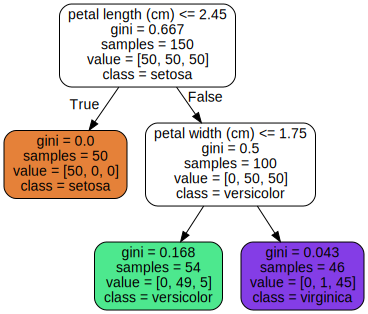

In [3]:
from graphviz import Source
from sklearn.tree import export_graphviz
IMAGES_PATH = r'/home'
export_graphviz(
        tree_clf,
        out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot"))

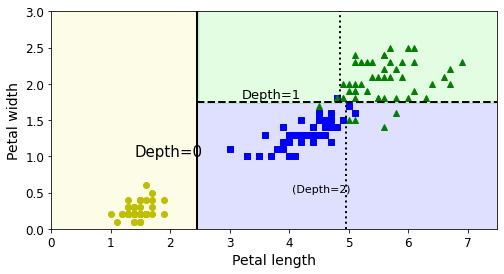

In [4]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    #print(x1.ravel()[:5])
    X_new = np.c_[x1.ravel(), x2.ravel()]
    #print(X_new[:3])
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

plt.show()

# Predicting classes and class probabilities

### Task 2
Next, predict the probabilities and the class for the following values: ``` [5, 1.5] ```

In [5]:
class_prob = tree_clf.predict_proba([[5,1.5]])
print("probability for setosa, versicolor and virginica are as follows : \n", class_prob)

probability for setosa, versicolor and virginica are as follows : 
 [[0.         0.90740741 0.09259259]]


In [6]:
y_pred = tree_clf.predict([[5,1.5]])
y_pred


array([1])

# Sensitivity to training set details

### Task 3
Next, we want to expolore the sensitivity to the training set details. 
What does the output below show? 

Hint, refer to the dataset description: 
https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html
and think about the slicing of the array below. Which values are selected and which data do they show? 

In [ ]:
X[:, 1][y==1].max() # maximum petal width for versicolor class


1.8

In [ ]:
X[:, 1]==X[:, 1][y==1].max() # checks whether the 150 instances has petal width equal to 1.8  or not: True means that entry has 1.8 petal width...


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False,  True,
        True, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False,  True, False,  True,
        True,  True,

In [ ]:
(X[:, 1]==X[:, 1][y==1].max()) & (y==1) # checks how many instances has the petal width 1.8 and versicolor (only one true amidst sea of false)


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [8]:
X[(X[:, 1]==X[:, 1][y==1].max()) & (y==1)] #that one instances is presented here! petal length 4.8 and width 1.8

array([[4.8, 1.8]])

Now, what if we select the values that are NOT 1.8. Which data would the dataset represent? 

In [ ]:
(X[:, 1]!=1.8) | (y==2) #selecting the entries(setting it to true), which are either virginica or the petal length is not equals to 1.8
#so except the versicolor instance which had 1.8 petal width all other entries are selected! So other instances who has 1.8 petal width they must be virginica to be set to true.

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [11]:
not_1_8 = (X[:, 1]!=1.8) | (y==2)
X_tweaked = X[not_1_8]
y_tweaked = y[not_1_8]
#X_tweaked.shape

Fit a new Decision Tree Classifier to these values with the same initial parameter values for ```max_depth``` and ```random_state```.

In [12]:
tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf_tweaked.fit(X_tweaked,y_tweaked)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

Let's visualize the results. What are they telling you? 


> After the removal of the widest versicolor instance from the training set, all the decisions are made in terms of the the petal width feature. At depth 0 node the instances with petal width less than 0.9 are setosa and petal width greter than 0.9 could be either versicolor or virginica. In depth 1 node then the decision node ask if the petal width is less than 1.8? If it is then it belongs to the virginica and if not then it belongs to the versicolor. However, the gini impurity is not perfect since it is evident from the picture the some versicolor invaded into the virgicica territory.





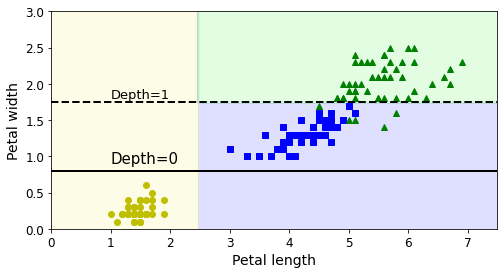

In [13]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_tweaked, X_tweaked, y_tweaked, legend=False)
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.0, 0.9, "Depth=0", fontsize=15)
plt.text(1.0, 1.80, "Depth=1", fontsize=13)

plt.show()

# Regression trees

In this subsection, we will be working with a regression task. 
Notice that the dataset below is different. Here we are using a training set generated by a quadratic function with the addition of some random noise. 

In [14]:
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

### Task 4
Similar to what you've done above, create a decision tree regressor with the same hyperparameters as the classifier. 

In [15]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2,random_state=42) 
tree_reg.fit(X,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

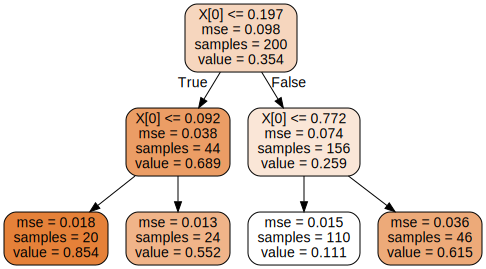

In [16]:
export_graphviz(
        tree_reg,
        out_file=os.path.join(IMAGES_PATH, "reg_tree.dot"),
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "reg_tree.dot"))

Below, you'll see the difference in the prediction for an increased value of the ```max_depth``` parameter. What can you say about the results?



> Possible number of prediction values increases (i.e; leaf node increases) with the max_depth hyperparameter increment. For this binary decision tree regressor the number of prediction value is equal to `2**max_depth`. Noticing the resulting leaf nodes (see the decision tree figures for regression 1 and 2), some of them has better mean square error (MSE) which means predicted value (average of the samples in that node) is much closer to the actual values of the instances--which may be very tempting but could easily lead to overfitting of the data and won't generalize better in the production. So, it would be better decision to stop splitting if there is no statistically significant improvement in MSE for the child nodes. 





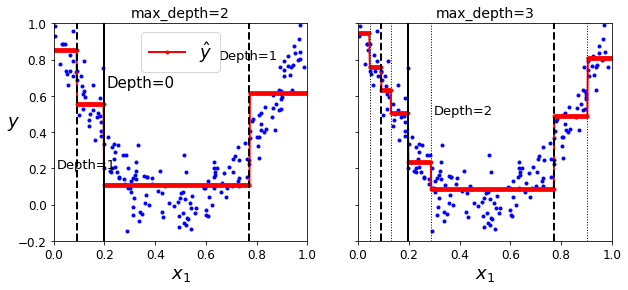

In [17]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.sca(axes[1])
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

plt.show()

In [18]:
export_graphviz(
        tree_reg1,
        out_file=os.path.join(IMAGES_PATH, "regression1_tree.dot"),
        feature_names=["x1"],
        rounded=True,
        filled=True
    )

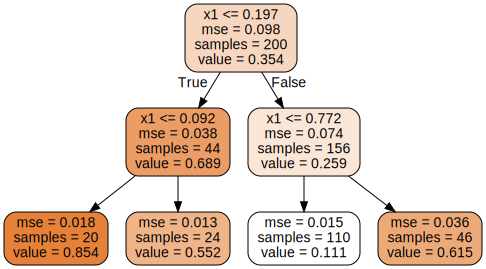

In [12]:
Source.from_file(os.path.join(IMAGES_PATH, "regression1_tree.dot"))

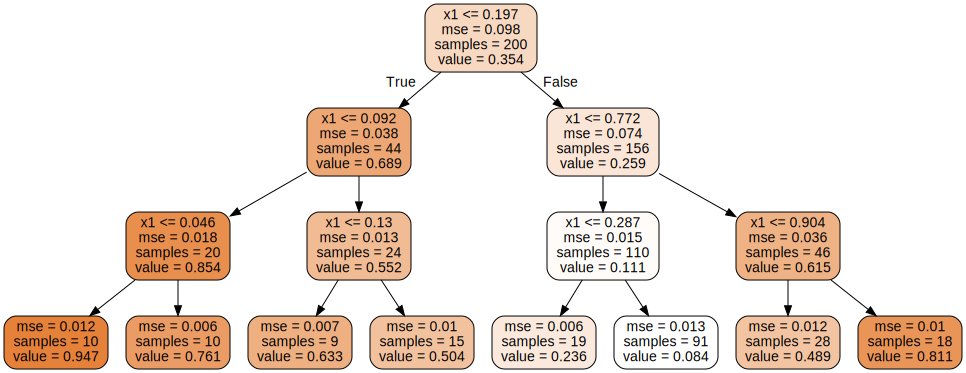

In [19]:
export_graphviz(
        tree_reg2,
        out_file=os.path.join(IMAGES_PATH, "regression2_tree.dot"),
        feature_names=["x1"],
        rounded=True,
        filled=True
    )
Source.from_file(os.path.join(IMAGES_PATH, "regression2_tree.dot"))

### Task 5
Similarly to task 4, discuss the effect of the restrictions on the regression results. 


> In the left figure the regressor has the default hyperparameter max_depth=None which means infinite depth results into overfitting of the data. 


> In the right figure the hyperparamter min_samples_leaf is set to 10 which means the minimum number of samples need to be in a leaf node at least 10. Hence the model generalizes better and the overfitting was avoided. 





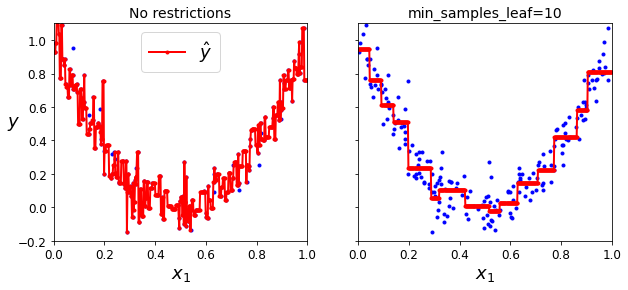

In [20]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

plt.sca(axes[1])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)

plt.show()

# Exercises

## Exercise 8
Grow a forest.

a. Continuing the previous exercise, generate 1,000 subsets of the training set, each containing 100 instances selected randomly. Hint: you can use Scikit-Learn's `ShuffleSplit` class for this.

Hint: if you struggle for over ten minutes, here is the solution
https://docs.google.com/document/d/1bmGiVNeJ8AMBcAg6i2J5_0j4A13gIq2thIxfvmMGnJM/edit?usp=sharing

In [22]:
#Going back to the iris data set. Since in last task X,y set to a regressor data set

X = iris.data[:, 2:] # petal length and width
y = iris.target
X.shape

(150, 2)

In [24]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split


n_trees = 1000
n_instances = 100
mini_sets = []


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # from 150 iris flower instance we are keeping random 30 for the test  
#print(len(X_train))

rs = ShuffleSplit(n_splits=n_trees, test_size=len(X_train) - n_instances, random_state=42) # test size 20. train size 100. 
                                                 #n_trees 1000 so 1000 permutation of index is obtained and then splitted into test and train batch according to the size above
for mini_train_index, mini_test_index in rs.split(X_train):
    # continue here 
    # fill the mini_sets list with he values for X and y 
    X_mini_train = X_train[mini_train_index]
    y_mini_train = y_train[mini_train_index]
    mini_sets.append((X_mini_train,y_mini_train))

b. Train one Decision Tree on each subset, using the best hyperparameter values found above. Evaluate these 1,000 Decision Trees on the test set. Since they were trained on smaller sets, these Decision Trees will likely perform worse than the first Decision Tree, achieving only about 80% accuracy.

Hint: if you struggle for over ten minutes, here is the solution

https://docs.google.com/document/d/1KOOgvjhJznt8EriCvJMei_zFxuQ3P49s8sRzFxrn9ak/edit?usp=sharing

In [27]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth' : list(range(2, 5)),'max_leaf_nodes': list(range(2, 50)), 'min_samples_split': list(range(2,10))}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)

grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 1152 candidates, totalling 3456 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 3456 out of 3456 | elapsed:    4.2s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [2, 3, 4],
                         'max_l

In [28]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=3,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [29]:
from sklearn.base import clone
from sklearn.metrics import accuracy_score

forest = [clone(grid_search_cv.best_estimator_) for _ in range(n_trees)]
#print(forest[:2])
accuracy_scores = []

for tree, (X_mini_train, y_mini_train) in zip(forest, mini_sets):
    # continue here
    # for each tree in the forst, fit the values you defined above
    tree.fit(X_mini_train,y_mini_train)
    # obrain the predictions for each tree
    y_pred = tree.predict(X_test)
    # calculate the accuracy scores and fill the accuracy_scores list with them. 
    accuracy_scores.append(accuracy_score(y_test,y_pred))

What is the mean value of the accuracy scores? 

In [30]:
np.mean(accuracy_scores)

0.9833333333333335

c. Now comes the magic. For each test set instance, generate the predictions of the 1,000 Decision Trees, and keep only the most frequent prediction (you can use SciPy's `mode()` function for this). This gives you _majority-vote predictions_ over the test set.

In [31]:
Y_pred = np.empty([n_trees, len(X_test)], dtype=np.uint8) #empty array of dimension 1000,40 Note:Suggested unit8 won't work for this case so I changed it to float64

for tree_index, tree in enumerate(forest):
    Y_pred[tree_index] = tree.predict(X_test)

In [32]:
Y_pred.shape #(1000,40)
X_test.shape #(40,1)
Y_pred[:2]

array([[1, 0, 2, 1, 2, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
        0, 2, 2, 2, 2, 2, 0, 0],
       [1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
        0, 2, 2, 2, 2, 2, 0, 0]], dtype=uint8)

In [34]:
from scipy.stats import mode

y_pred_majority_votes, n_votes = mode(Y_pred,axis=0)
y_pred_majority_votes
n_votes

array([[1000, 1000, 1000, 1000,  588, 1000, 1000, 1000, 1000, 1000, 1000,
        1000, 1000, 1000, 1000,  980, 1000, 1000, 1000, 1000, 1000,  932,
        1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]])

d. Evaluate these predictions on the test set: you should obtain a slightly higher accuracy than your first model (about 0.5 to 1.5% higher). Congratulations, you have trained a Random Forest classifier!

In [35]:
accuracy_score(y_test, y_pred_majority_votes.reshape([-1]))

1.0

### Task 9 (Optional, if you end up having extra time )

Train a `LinearSVC` on a linearly separable dataset. Then train an `SVC` and a `SGDClassifier` on the same dataset. 
See if you can get them to produce roughly the same model.
Hint: continue working with the Iris dataset. 

In [ ]:
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:
# lin_clf = 
# svm_clf = 
# sgd_clf = 

In [ ]:
# Compute the slope and bias of each decision boundary

# w1 = 
# b1 = 
# w2 = 
# b2 = 
# w3 = 
# b3 = 

In [ ]:
# Transform the decision boundary lines back to the original scale

# line1 = 
# line2 = 
# line3 = 

Use the script below for plotting. 

In [ ]:
# Plot all three decision boundaries
plt.figure(figsize=(11, 4))
plt.plot(line1[:, 0], line1[:, 1], "k:", label="LinearSVC")
plt.plot(line2[:, 0], line2[:, 1], "b--", linewidth=2, label="SVC")
plt.plot(line3[:, 0], line3[:, 1], "r-", label="SGDClassifier")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs") # label="Iris versicolor"
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo") # label="Iris setosa"
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper center", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.show()